Name : Chathumini B.G.D.T.

Index Number : 190107T

Assignment 1

Question 1

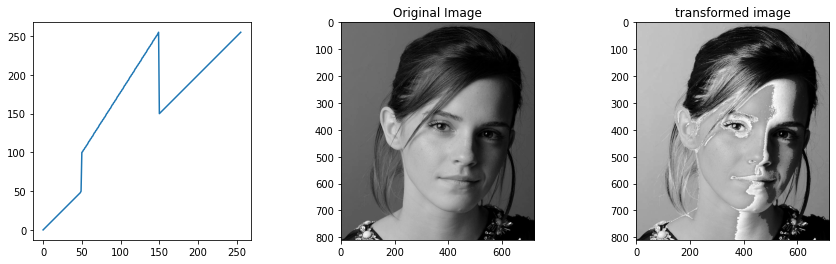

In [32]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

emma =  cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert emma is not None

# linearly spaced values
t1=np.linspace(0,50,50) 
t2=np.linspace(50,100,0) 
t3=np.linspace(100,255,100) 
t4=np.linspace(255,150,0) 
t5=np.linspace(150,255,106) 

transform = np.concatenate((t1,t2,t3,t4,t5), axis = 0).astype(np.uint8)  #connect all 3 transformations 
assert len(transform) == 256
emma_transformed= cv.LUT(emma,transform)

fig, axis = plt.subplots(1,3)
fig.set_figwidth(15)
axis[0].plot(transform)
axis[0].set_aspect('equal')
axis[1].imshow(emma, cmap='gray', vmin=0, vmax=255)
axis[1].set_title("Original Image")
axis[2].imshow(emma_transformed, cmap='gray', vmin=0, vmax=255)
axis[2].set_title("transformed image")
plt.show()

Question 2

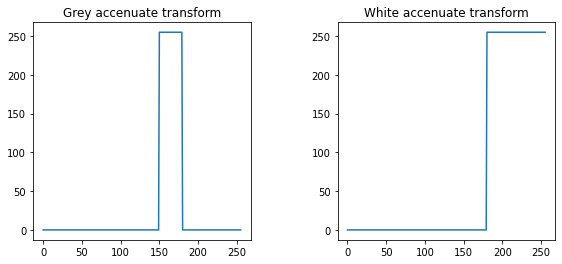

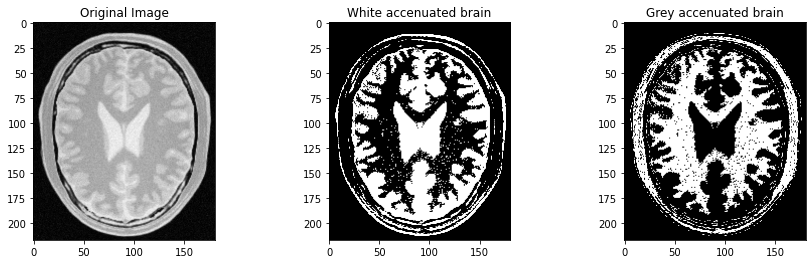

In [35]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

brain =  cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert brain is not None

# accenuate white
p1=np.linspace(0,0,180) 
p2=np.linspace(0,255,0)
p3=np.linspace(255,255,76) 

# accenuate Grey 
t1=np.linspace(0,0,150) 
t2=np.linspace(0,255,0)
t3=np.linspace(255,255,30) 
t4=np.linspace(255,0,0) 
t5=np.linspace(0,0,76) 

accenuate_white = np.concatenate((p1,p2,p3), axis = 0).astype(np.uint8)  #connect all 3 transformations 
assert len(accenuate_white) == 256
accenuate_grey = np.concatenate((t1,t2,t3,t4,t5), axis = 0).astype(np.uint8)  #connect all 3 transformations 
assert len(accenuate_grey) == 256

fig1, ax = plt.subplots(1,2)
fig1.set_figwidth(10)
ax[0].plot(accenuate_grey)
ax[0].set_title("Grey accenuate transform")
ax[0].set_aspect('equal')
ax[1].plot(accenuate_white)
ax[1].set_title("White accenuate transform")
ax[1].set_aspect('equal')

white_accenuated_brain = cv.LUT(brain,accenuate_white)
grey_accenuated_brain = cv.LUT(brain,accenuate_grey)

fig2, axis = plt.subplots(1,3)
fig2.set_figwidth(15)
axis[0].imshow(brain, cmap='gray', vmin=0, vmax=255)
axis[0].set_title("Original Image")
axis[1].imshow(white_accenuated_brain, cmap='gray', vmin=0, vmax=255)
axis[1].set_title("White accenuated brain")
axis[2].imshow(grey_accenuated_brain, cmap='gray', vmin=0, vmax=255)
axis[2].set_title("Grey accenuated brain")
plt.show()

Question 3

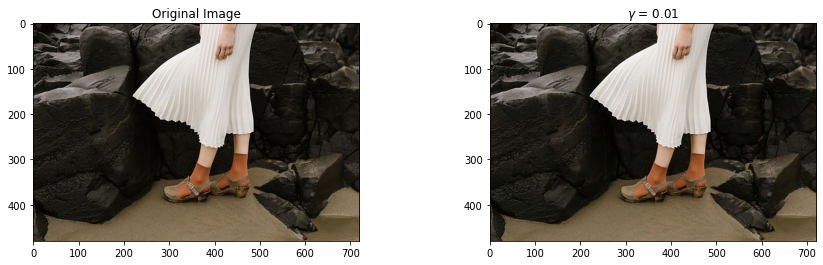

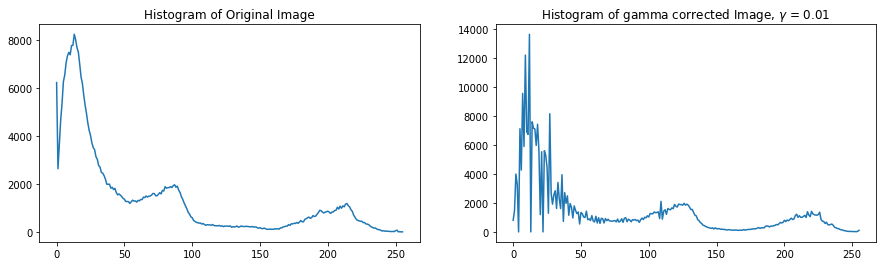

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im =  cv.imread("highlights_and_shadows.jpg")
assert im is not None

im_lab = cv.cvtColor(im, cv.COLOR_BGR2Lab)
(l,a,b)= cv.split(im_lab)

gamma = 0.01
g_transform = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
g_transformed = cv.LUT(l, g_transform)
im_lab = cv.merge([l,a,b])

im_hist = cv.calcHist([im],[0],None,[256],[0,256])
im_lab_hist = cv.calcHist([im_lab],[0],None,[256],[0,256])

fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(im_lab, cv.COLOR_Lab2RGB))
ax[1].set_title("$\gamma$ = "+ str(gamma))

fig2, axis = plt.subplots(1,2)
fig2.set_figwidth(15)
axis[0].plot(im_hist)
axis[0].set_title("Histogram of Original Image")
axis[1].plot(im_lab_hist)
axis[1].set_title("Histogram of gamma corrected Image, $\gamma$ = "+ str(gamma))
plt.show()
